<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przykład 1. Regresja liniowa dla zbioru Diabetes

Coefficients: 
 [306.72757499]
Residual sum of squares: 5472.26
Variance score: -0.13
-------------------------------------------------------
Coefficients: 
 [59.78480979]
Residual sum of squares: 5501.91
Variance score: -0.14
-------------------------------------------------------
Coefficients: 
 [938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47
-------------------------------------------------------
Coefficients: 
 [709.19471785]
Residual sum of squares: 4058.41
Variance score: 0.16
-------------------------------------------------------
Coefficients: 
 [352.82770178]
Residual sum of squares: 5608.70
Variance score: -0.16
-------------------------------------------------------
Coefficients: 
 [288.4846506]
Residual sum of squares: 5564.14
Variance score: -0.15
-------------------------------------------------------
Coefficients: 
 [-647.34661414]
Residual sum of squares: 4538.34
Variance score: 0.06
-------------------------------------------------------
Coefficien

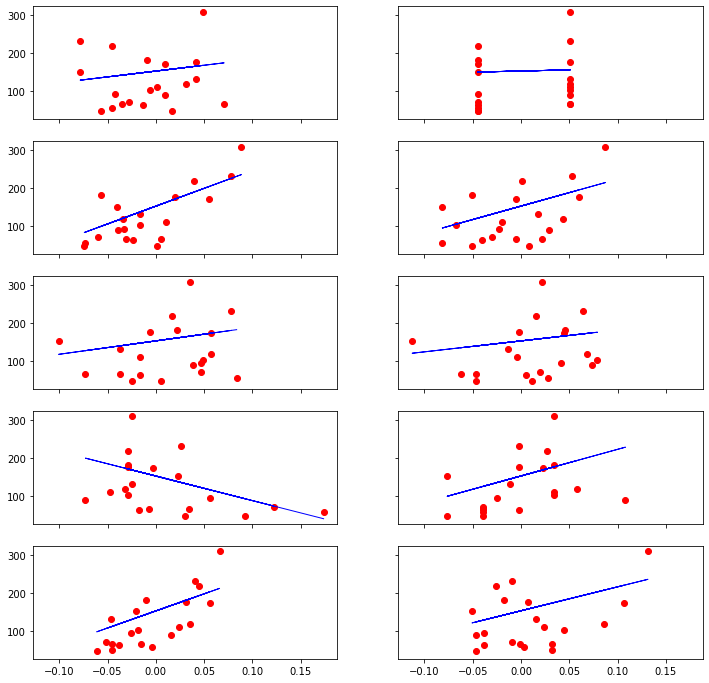

In [ ]:
# https://ksopyla.com/machine-learning/modele-regresji-liniowej-z-scikit-learn/

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# będzie 5 wierszy i 2 kolumny, a podwykresy będą dzielić ze sobą oś x i oś y
# Przechowywane będą w tablicy axarr o wymiarach 5x2
f, axarr = plt.subplots(5,2, sharex=True, sharey=True, figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        # Use only one feature
        diabetes_X = diabetes.data[:, np.newaxis, i*2+j]
        
        # Split the data into training/testing sets
        diabetes_X_train = diabetes_X[:-20]
        diabetes_X_test = diabetes_X[-20:]
        
        # Split the targets into training/testing sets
        diabetes_y_train = diabetes.target[:-20]
        diabetes_y_test = diabetes.target[-20:]
        
        # Create linear regression object
        regr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        regr.fit(diabetes_X_train, diabetes_y_train)
        
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean square error
        print("Residual sum of squares: %.2f"
              % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))
        # próbowałem inaczej. Czytałem na https://www.kaggle.com/getting-started/27261,
        # Jednak rzuca 
        # ValueError: Classification metrics can't handle a mix of multiclass and continuous targets
        # from sklearn.metrics import classification_report
        # print(classification_report(diabetes_y_test, regr.predict(diabetes_X_test)))
        
        print("-------------------------------------------------------")
        # Plot outputs
        axarr[i,j].scatter(diabetes_X_test, diabetes_y_test,  color='red')
        axarr[i,j].plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=1)
        
plt.show()

# Przykład 2. Porównanie modeli regresji liniowej. Zbiór Boston House Pricing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm

# Reggression models
# http://scikit-learn.org/stable/modules/linear_model.html

# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
print("Dane boston_X", boston_X[:5])
boston_Y = boston.target
print("Targety boston_Y", boston_Y[:5])
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]

# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# chcemy dokonać porównania różnych typów regresji. 
# W tym celu deklarujemy słownik zawierający obiekty rozpatrywanych typów regresji:
#  LinearRegression, Ridge, Lasso, ElasticNet. 
# Następnie w pętli dla każdego obliczamy błąd i zapamiętujemy w zmiennej fit_results.
regressors = {}
regressors['LinReg'] = linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] = linm.ElasticNet(alpha = .5, l1_ratio=0.5)

fit_results={}


for key in regressors:
    # Train the model using the training sets
    regr = regressors[key]
    regr.fit(boston_X_train, boston_y_train)
    # mean square error
    mse = np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= {'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=10.960410679422896
  wl1=27.446447711060653
  wl2=18.30257967932398
  w=[-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]
 
Ridge
----------
  mse=11.195127507244049
  wl1=22.455522943462515
  wl2=13.721374175259088
  w=[-1.02102273e-01  5.02013578e-02  8.80018592e-03  2.44957291e+00
 -1.28232742e+01  3.84148840e+00  6.44215775e-03 -1.37722226e+00
  3.53296950e-01 -1.62693966e-02 -8.55851103e-01  9.89548869e-03
 -5.61106278e-01]
 
Lasso
----------
  mse=15.166420470206356
  wl1=0.8815286487451348
  wl2=0.7836759400442244
  w=[-0.          0.04108094 -0.          0.          0.          0.
  0.04466578 -0.          0.         -0.00861893 -0.          0.0059101
 -0.7812529 ]
 
ElNet
----------
  mse=13.894251181932823
  wl1=4.906963287634067
  wl2=2.348667810255262
  w=[-0.08762685  0.05765551 -0.0332571

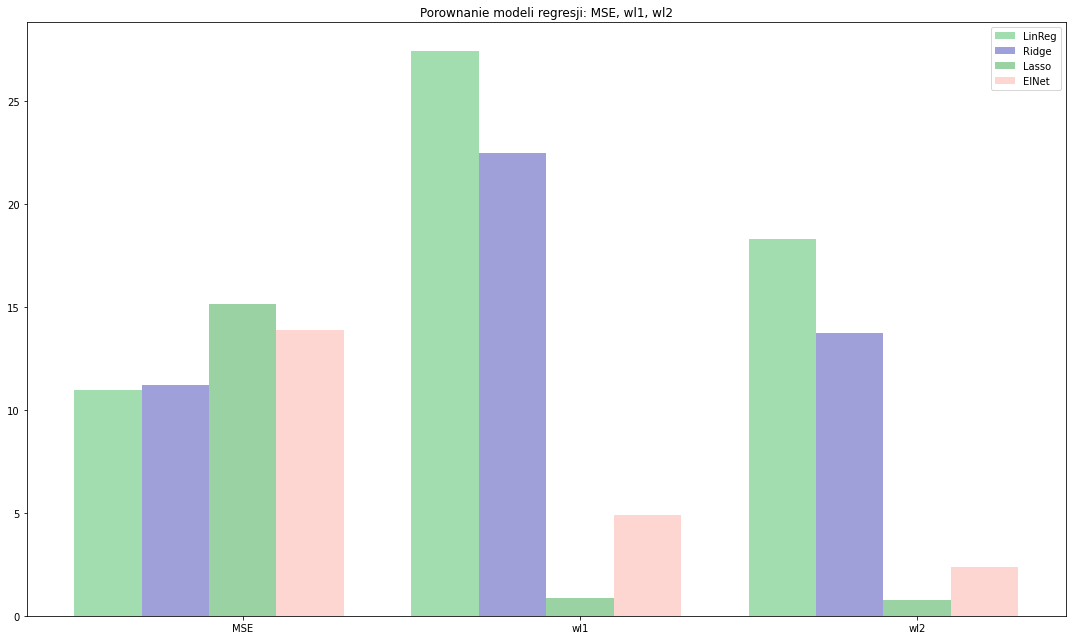

In [ ]:
# Na końcu wyświetlmy obliczone błędy regresji na wykresie,
# tak aby łatwo można było dokonać porównania. 
# W pętli pobieramy uprzednio obliczone wartości i rysujemy w postaci wykresu słupkowego. 
# Dla każdego typu regresji mamy trzy parametry (mse, wl1, wl2), 
# które odkładamy na w postaci trzech słupków. Każdy typ regresji otrzymał inny kolor.
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4

fig, ax = plt.subplots(figsize=(15,9))

t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index + bar_width*t, res_val, bar_width,
                 alpha=opacity,
                # rzucał błąd bo zły wimiar
                #  color=np.random.rand(3,1),
                 color=np.random.rand(1,3),
                # przykładowe ustalone kolory
                #  color=np.array([0.01253564, 0.02546434, 0.03452345]),
                 label=key
    )
    t+=1

#plt.xlabel('Modele regresji')
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# W wyniku otrzymamy diagram dokonujący porównania trzech wartości:

# MSE – mean square error, czyli błędu dopasowania,
# wl1 – wartość normy l1 wektora w,
# wl2 – wartość normy l2 wektora w



# Na powyższym wykresie mamy zobrazowany trzy rozpatrywane parametry MSE,
# normę l1 i l2 dla każdego typu regresji: ElasticNet(zielony), Linear regression (czerwony), 
# Ridge regression (szary), Lasso (żółty).

# Pokazuje on kilka istotnych informacji, które mogą posłużyć do wyboru modelu. 
# Po pierwsze, zależy nam na tym, aby MSE był jak najmniejszy. 
# W naszym przykładzie najmniejszą wartość osiągnęła Liniowa Regresja (kolor czerwony), 
# tuż za nią Ridge (szary).

# Warto także zwrócić uwagą na dwa pozostałe policzone parametry, normy l1 i l2 
# charakteryzujące znaleziony wektor ‘w’. Ze względu na stabilność numeryczną zależy nam, 
# aby wartości tego wektora nie były duże (norma l2 mała). 
# Pod względem tego kryterium lepiej wypada ElasticNet i Lasso.

# Natomiast w przypadku gdy mamy do czynienia z danymi wielowymiarowymi chcielibyśmy, 
# aby wektor ‘w’ był rzadki (norma l1 mała). 
# W tym przypadku Lasso (kolor żółty) i ElasticNet (zielony) promują rozwiązania rzadkie.